## <b> Problem Statement </b>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## <i>Goal: </i>
* To build a predictive model 
* To find out the sales of each product at a particular store.

### Hypothesis Generation: 
There are various factors which would affect the sale of Bigmart products. Below are few assumptions that I consider: 

* <b>Outlet Location:</b> Tier 1 cities would would contribute to more revenue due to higher income and lifestyle of people there. 
* <b>Item visibilty:</b> Items that can be easily located in a store have higher probablity of selling. Arranged stores would sell more products and thus generate more revenue. 
* <b>Outlet type:</b> Supermarket have more sales than Grocery stores in general. 
* <b>Item Fat:</b> People with healthy lifestyle prefer less fat content products. Thus, Low fat products might have greater sales. 
* <b>Outlet size:</b> Size of the outlet might have some effect on sale of the products. Medium/Bigger size outlets would have more walking space and might increse sales. 

In [85]:
#Loading necessary Packages

import pandas as pd
import numpy as np

#Loading visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Machine Learning packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as CVS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

We are given two datasets, Train.csv and Test.csv. Let's explore them independently. 

### Decoding the Dataset

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

* Item_Identifier: Unique product ID

* Item_Weight: Weight of product

* Item_Fat_Content: Whether the product is low fat or not

* Item_Visibility: The % of total display area of all products in a store allocated to the particular product

* Item_Type: The category to which the product belongs

* Item_MRP: Maximum Retail Price (list price) of the product

* Outlet_Identifier: Unique store ID

* Outlet_Establishment_Year: The year in which store was established

* Outlet_Size: The size of the store in terms of ground area covered

* Outlet_Location_Type: The type of city in which the store is located

* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [86]:
#Loading the Dataset
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

### Exploring the Dataset

In [87]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [88]:
df_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [89]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [90]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [91]:
df_train.info() , df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

* Inference: 
    * <b>Item_Weight</b> and <b>Outlet_size</b> contains missing values, since there counts are lower than other columns. 
    * There are total of 5(Test data) and 4(train data) numberic variables (float64,int64 type data type). 
    * There are total of 7 categorical variables (Object type data type).

#### Dimension of the data

In [92]:
print("The dimension of Train data is : ",df_train.shape,"\nThe dimension of test data is: ", df_test.shape)

The dimension of Train data is :  (8523, 12) 
The dimension of test data is:  (5681, 11)


In [93]:
print("The size of Train data is : ",df_train.size, "\nThe size of Test data is: ",df_test.size)

The size of Train data is :  102276 
The size of Test data is:  62491


#### Checking for Duplicate Values

In [94]:
print("Duplicate values in Train dataset: ",df_train.duplicated().sum(),"\nDuplicate values in Test dataset: ",df_test.duplicated().sum())

Duplicate values in Train dataset:  0 
Duplicate values in Test dataset:  0


* Inference : There are no duplicate values to be removed in the datasets. 

Using Describe function to understand the statistic measures such as mean, median, etc. of the dataset. 

In [95]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [96]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


* Inference: 

    * The count of <b>Item_Weight</b> in both the datasets is less than the other columns, implies there are missing values. 
    * All the statistical values are almost similar in both datasets.
    * <b>Item_Visibility</b> has minimum value 0. This raises a question, If an item is not visible, how is it getting sold at the Bigmart? 


#### Checking for unique values in each of the columns

In [97]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [98]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

* Inference: 


    * <b> Item_Fat_Content</b> has 5 different categories across both datasets. 
    * <b> Item_Type</b> has 16 different categories. 
    * <b> Outlet_Size </b> and <b> Outlet_Location_Type</b> has 3 different categories. 
    * <b> Outlet_Establishment_Year </b> has 9 categories. 
    * <b> Outlet_Type </b> has 4 different categories. 

### Missing Value Treatment

In [99]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [100]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [101]:
missing_values=df_train.isnull().sum().sum()
total_values=np.product(df_train.shape)

percentage=(missing_values/total_values)*100
print('Missing values=', missing_values,'\nTotal values=',total_values)
print(f'percent={round(percentage,3)}%')

Missing values= 3873 
Total values= 102276
percent=3.787%


In [102]:
missing_values=df_test.isnull().sum().sum()
total_values=np.product(df_test.shape)

percentage=(missing_values/total_values)*100
print('Missing values=',missing_values,'\nTotal values=',total_values)
print(f'percent={round(percentage,3)}%')

Missing values= 2582 
Total values= 62491
percent=4.132%


* Inference: 

    * We can observe that there are 1463 and 2410 missing values in the columns <b>'Item_Weight'</b> and <b>'Outlet_Size'</b> of Train data. 
    * Additionally, there are 976 and 1606 missing values respectively in the columns <b>'Item_Weight'</b> and <b>'Outlet_Size'</b> of Test data. 
    * In terms of percentage, almost 3% and 4% of overall dataset is missing in train and test data respectively. 

Question is, how to adjust those! 

    Do we simply remove it? 
    But wouldn't that make our dataset much smaller? 
    So what options do we have? 

* There are multiple ways to deal with missing values in a dataset. We will be considering the statistical measures for it. 
* For numerical values (Item_Weight in our case), we can replace the missing values with the mean or median of the feature(column).
* For categorical values (Outlet_Size in our case), we are going to consider the mode (values that occured the most). 

In [103]:
#Filling the missing values with the help of function 'fillna'

df_train['Outlet_Size'] = df_train.Outlet_Size.fillna(df_train.Outlet_Size.dropna().mode()[0])
df_train['Item_Weight'] = df_train.Item_Weight.fillna(df_train.Item_Weight.mean())
print(df_train.isnull().sum())
print(df_train.shape)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
(8523, 12)


In [104]:
df_test['Outlet_Size'] = df_test.Outlet_Size.fillna(df_test.Outlet_Size.dropna().mode()[0])
df_test['Item_Weight'] = df_test.Item_Weight.fillna(df_test.Item_Weight.mean())
print(df_test.isnull().sum())
print(df_test.shape)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64
(5681, 11)


As we can notice that, there are no more missing values in the datsets. We can move forward with our exploration. 

Let us focus on the column <b>'Item_Outlet_Sales'</b> and understand its spread over the datset.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

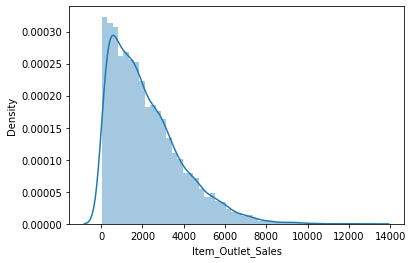

In [105]:
sns.distplot(df_train['Item_Outlet_Sales'])

* Inference : 
    * Deviation from Normal Distribution. 
    * Is Positively skewed. 

In [106]:
print('Skewness: %f' % df_train['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' % df_train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


<b>Dividing the datset into Categorical and Numerical variables of the train data</b>

In [107]:
num=df_train.select_dtypes('number')
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [108]:
cat=df_train.select_dtypes('object')
cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


Let us have a look at both the numerical and categorical variables in details. 

### Categorical Variables: 

<b>Dealing with Categorical Variables</b>

* Item_Identifier
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

In [109]:
cat.groupby(['Item_Identifier'])['Item_Identifier'].count().sort_values()

Item_Identifier
DRF48     1
FDO33     1
FDK57     1
FDQ60     1
FDC23     1
         ..
FDX20     9
FDF56     9
NCQ06     9
FDG33    10
FDW13    10
Name: Item_Identifier, Length: 1559, dtype: int64

* Inference : We have 1559 products in total (as mentioned in the problem statement) and each product can be identified uniquely with the help of 'Item_Identifier' column. 

In [110]:
cat.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

* Inference : The categories LF, Low Fat and low fat have similar Items and 'reg' and 'Regular' also contains similar Items. Lets divide them properly into two categories.

In [111]:
print('Original Categories:')
print(df_train['Item_Fat_Content'].value_counts())
print(df_test['Item_Fat_Content'].value_counts())

print('\nModified Categories:')

df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace=True)
df_train.Item_Fat_Content.value_counts()

df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace=True)
df_test.Item_Fat_Content.value_counts()

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Modified Categories:


Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

* Inference : People prefer buying Low Fat food type more than Regular. This checks our hypothesis as well. 

In [112]:
cat.groupby(['Item_Type'])['Item_Type'].count().sort_values()

Item_Type
Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

* Inference : 
    * The count of <b>Seafood Item Type</b> is the lowest in the dataset. 
    * The count of <b>Fruits and Vegetables Item Type</b> is the highest in the dataset. 

In [113]:
cat.groupby(['Outlet_Identifier'])['Outlet_Identifier'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Identifier, dtype: int64

In [114]:
cat.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High       932
Medium    5203
Small     2388
Name: Outlet_Size, dtype: int64

In [115]:
cat.groupby(['Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

In [116]:
cat.groupby(['Outlet_Type'])['Outlet_Type'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

* Inference: 

    * <b>Outlet_Identifier :</b> Outlet 27 has the highest count. May or may not have highest sales. 
    * <b>Outlet_Size : </b> The Medium size Outlets has more counts. 
    * <b>Outlet_Location_Type : </b>Tier 3 has the highest count. 
    * <b>Outlet_Type :</b> Count of Supermartket 1 has highest count. 

<b>Dealing with Numerical Variables</b>

Looking for Outliers in all columns. 

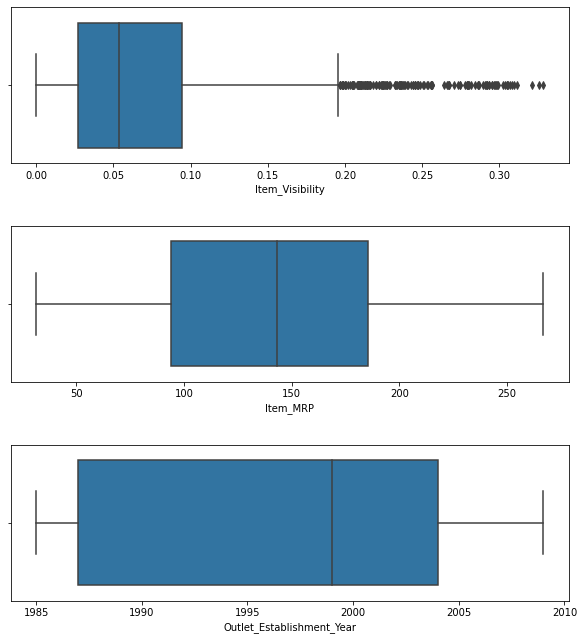

In [117]:
plt.figure(figsize = (10,6))

plt.subplot(311)
sns.boxplot(x='Item_Visibility', data=num)

plt.subplot(312)
sns.boxplot(x='Item_MRP', data=num)

plt.subplot(313)
sns.boxplot(x='Outlet_Establishment_Year', data=num)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [118]:
df_train.shape

(8523, 12)

Let us have a look at the train data once again!

In [122]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


* Inference : We can see clearly that 'Item_Visibility' has outliers. Let's remove those. 

We will be removing the Outliers with the help of Quantiles. 

* Now, Quantiles are values that split a sorted data in equal parts. A q-quantile divides the sorted data in q parts. The common quantiles are: 
    * Quartiles (4-quantiles): Three quartiles split the data into four parts.
    * Deciles (10-quantiles): Nine deciles split the data into 10 parts. 
    * Percentiles (100-quantiles): 99 percentiles split the data into 100 parts.
        
We will be using Quartiles to detect outliers. 
        
* Quartiles are a type of percentile. A percentile is a value with a certain percentage of the data falling below it. In general terms, k% of the data falls below the kth percentile. We divide the data into four parts as mentioned below: 
    * The first quartile (Q1, or the lowest quartile) is the 25th percentile, meaning that 25% of the data falls below the first quartile.
    * The second quartile (Q2, or the median) is the 50th percentile, meaning that 50% of the data falls below the second quartile.
    * The third quartile (Q3, or the upper quartile) is the 75th percentile, meaning that 75% of the data falls below the third quartile.

Upper limit:  0.190508941
Lower limit:  -0.071442255
(8364, 12)


Text(0.5, 1.0, 'Item_Visibility Distribution after removing outliers')

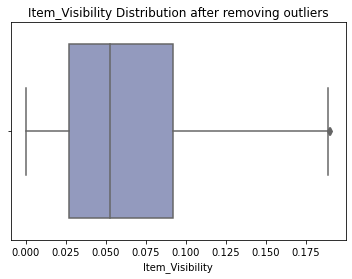

In [121]:
# Removing Outliers in 'Item_Visibility

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_train, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
df_train=df_train[(df_train['Item_Visibility'] > lower) & (df_train['Item_Visibility'] < upper)]

print(df_train.shape)
sns.boxplot(x=df_train['Item_Visibility'], palette='BuPu')
plt.title('Item_Visibility Distribution after removing outliers')

Let us have a look at the train data once again!

In [ ]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


The column 'Outlet_Establishment_Year' does not make sense. Lets convert it in Years by calculating teh age from the establishment year. 

In [125]:
#creating our new column for both datasets
df_train['Outlet_Age'], df_test['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year),df_test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

df_train['Outlet_Age'].head
#df_test['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       11
2       21
3       22
4       33
        ..
8518    33
8519    18
8520    16
8521    11
8522    23
Name: Outlet_Age, Length: 8364, dtype: int64>

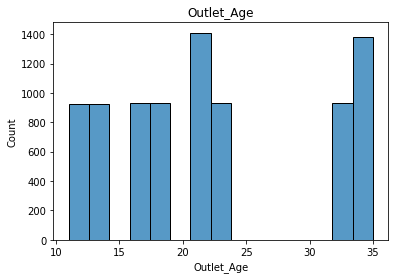

In [145]:
sns.histplot(df_train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

### Data Visualisation

#### Univariate Plots
We will create countplots for the categorical columns:

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

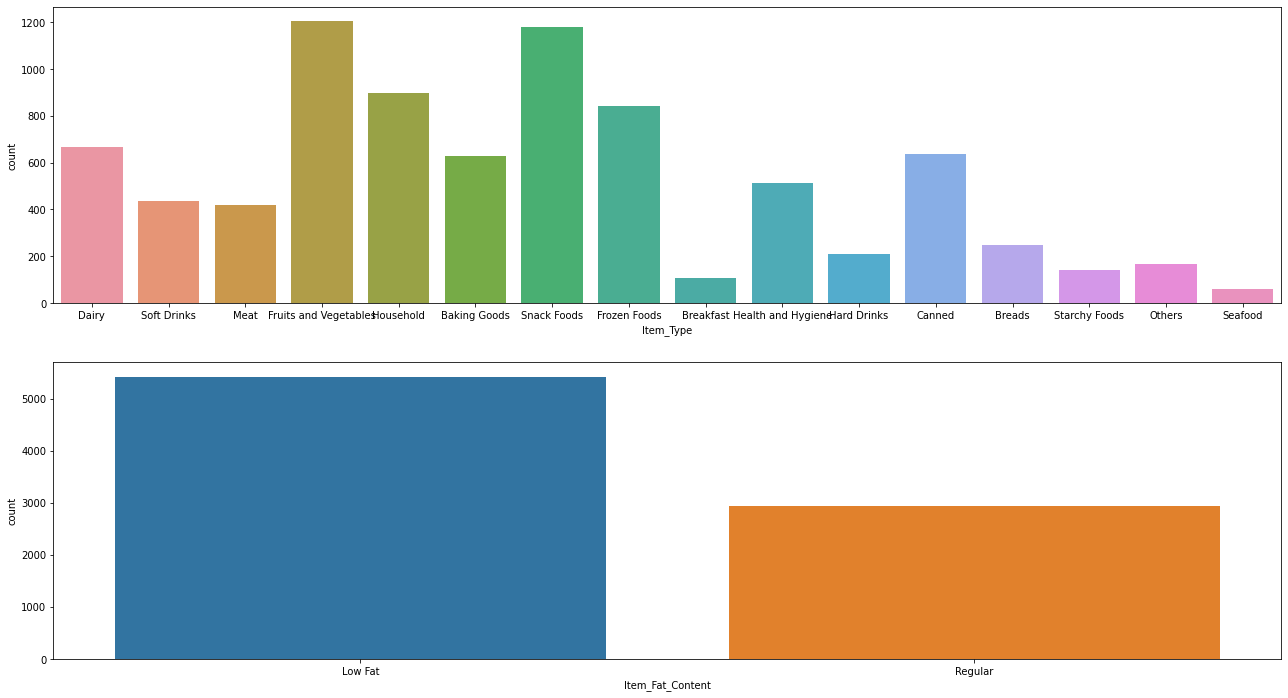

In [140]:
plt.figure(figsize=(22,12))
plt.subplot(211)
sns.countplot(x='Item_Type',data=df_train)

plt.subplot(212)
sns.countplot(x='Item_Fat_Content',data=df_train)

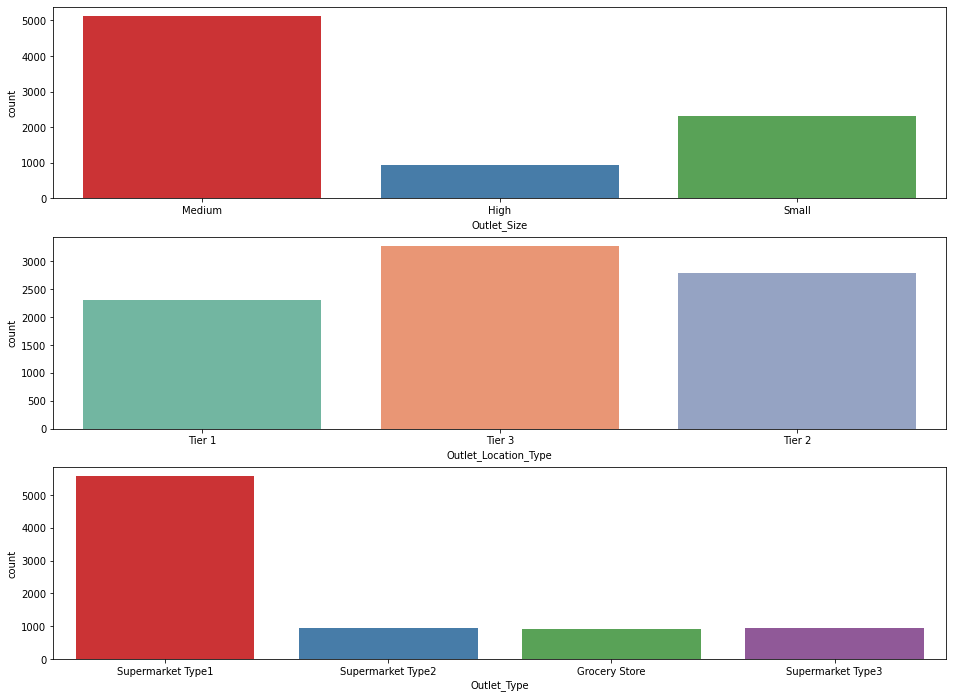

In [142]:
plt.figure(figsize = (16,12))

plt.subplot(311)
sns.countplot(x='Outlet_Size', data=df_train, palette="Set1")

plt.subplot(312)
sns.countplot(x='Outlet_Location_Type',data=df_train , palette="Set2")

plt.subplot(313)
sns.countplot(x='Outlet_Type', data=df_train, palette="Set1")

plt.show()

Text(0.5, 1.0, 'Outlet Idetifier')

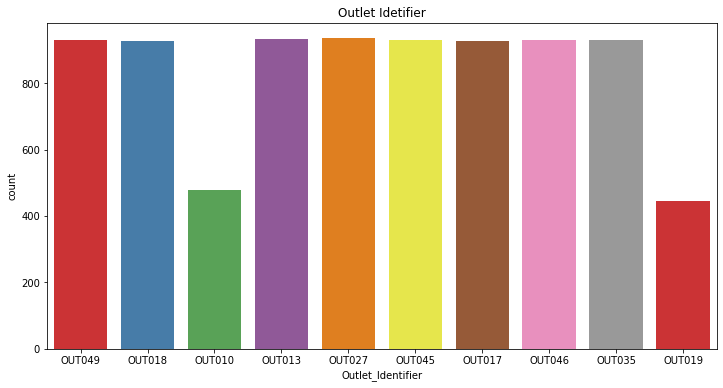

In [132]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outlet_Identifier', data=df_train, palette="Set1")
plt.title('Outlet Idetifier')

* Inference: 

    * `Item_Fat_Content` - Most items sold are low fat.
    * `Item_Type` - Item types that are distinctly popular are `fruits and vegetables` and `snack foods`.    
    * `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower. 
    * `Outlet_Size` - Bigmart outlets are mostly medium sized in our data. 
    * `Outlet_Location_Type` - The most common Outlet location type is `Tier3`.
    * `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

### Data Visualisation for Numeric Variables: 

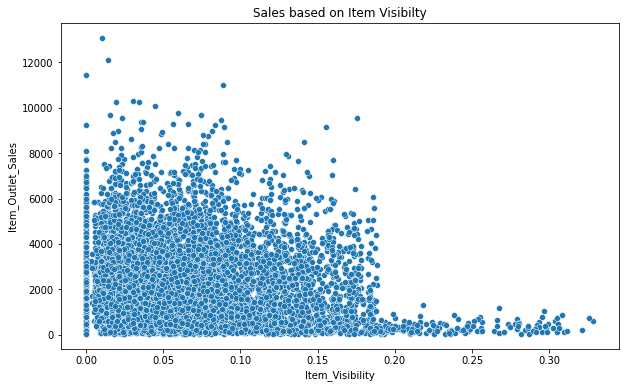

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_train['Item_Visibility'], df_train['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

* Doubt : There are a lot of zero values in Item_Visibilty, it does not makes sense because  an Item that is not visible can't be sold!

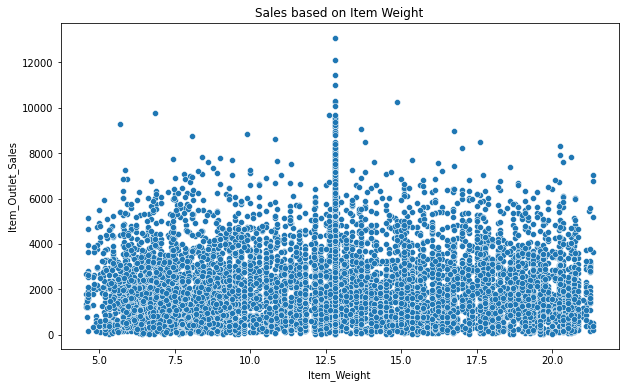

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_train['Item_Weight'], df_train['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

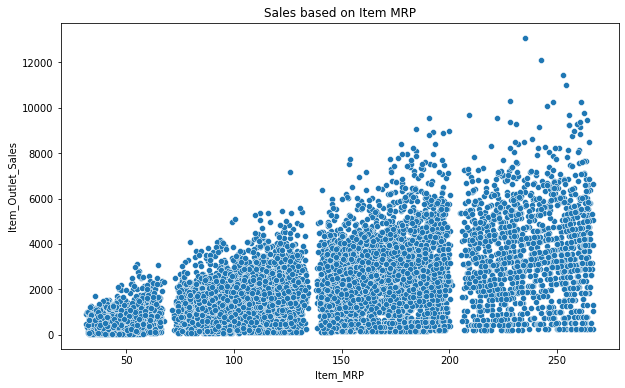

In [ ]:
# ScatterPlot for Sales per Item_MRP
plt.figure(figsize=(10,6))
sns.scatterplot(df_train['Item_MRP'], df_train['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

* Inferences : 

    * `Item_Visibility` - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
    * `Item_Weight` - There is no clear pattern for Item_Weight. However, we can notice that the sales are high for Item_Weight 12.5.
    * `Item_MRP` - Items with higher MRP tend to sell better in most cases. 

### Multivariate plots
I want to check the following relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

* Inference: 
    * We can observe that Item_MRP and Item_Outlet_Sales are positively correlated with correlation coeficient 0.564568. Meaning that both are dependent on each other. 

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

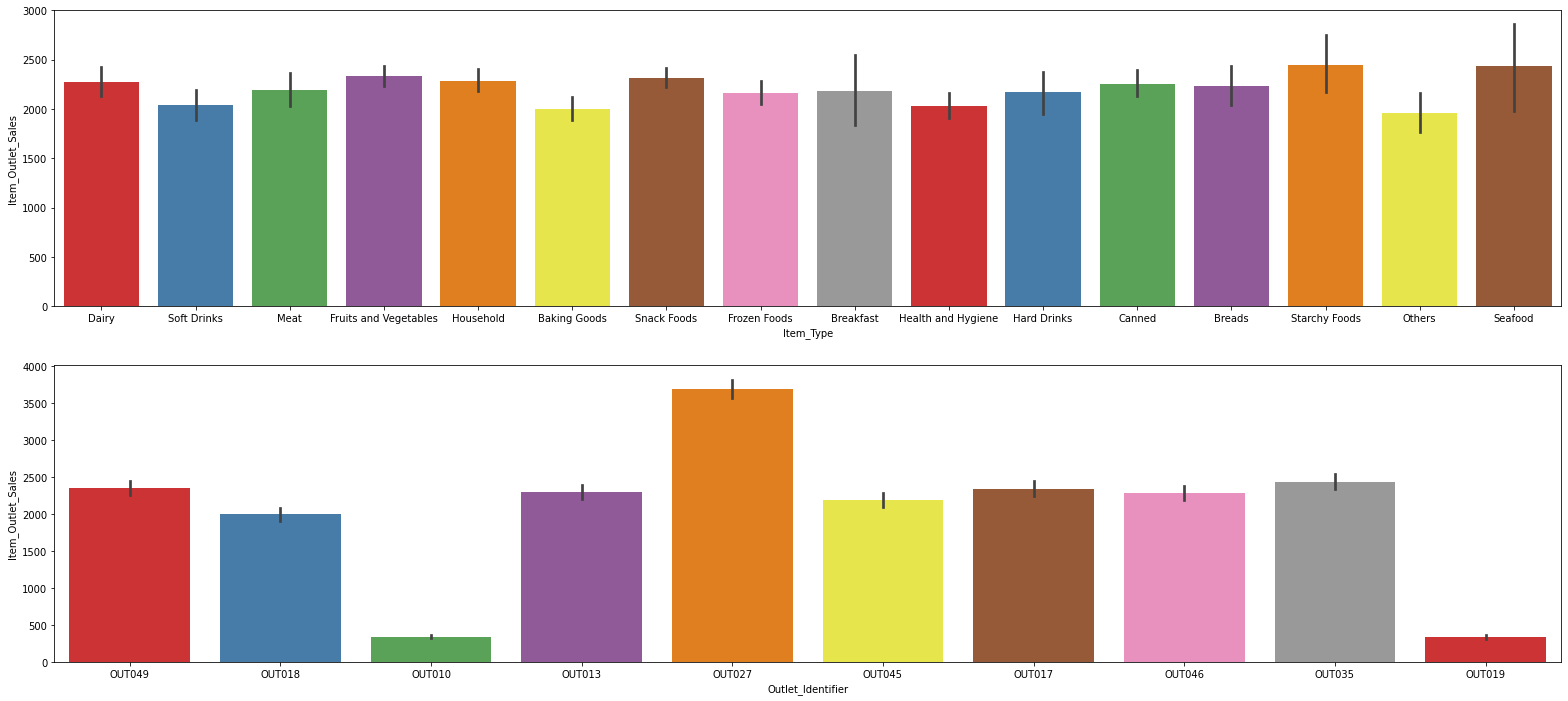

In [153]:
plt.figure(figsize = (27,12))
plt.subplot(211)
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train, palette="Set1")

plt.subplot(212)
sns.barplot(x='Outlet_Identifier' , y='Item_Outlet_Sales' , data=df_train, palette="Set1")

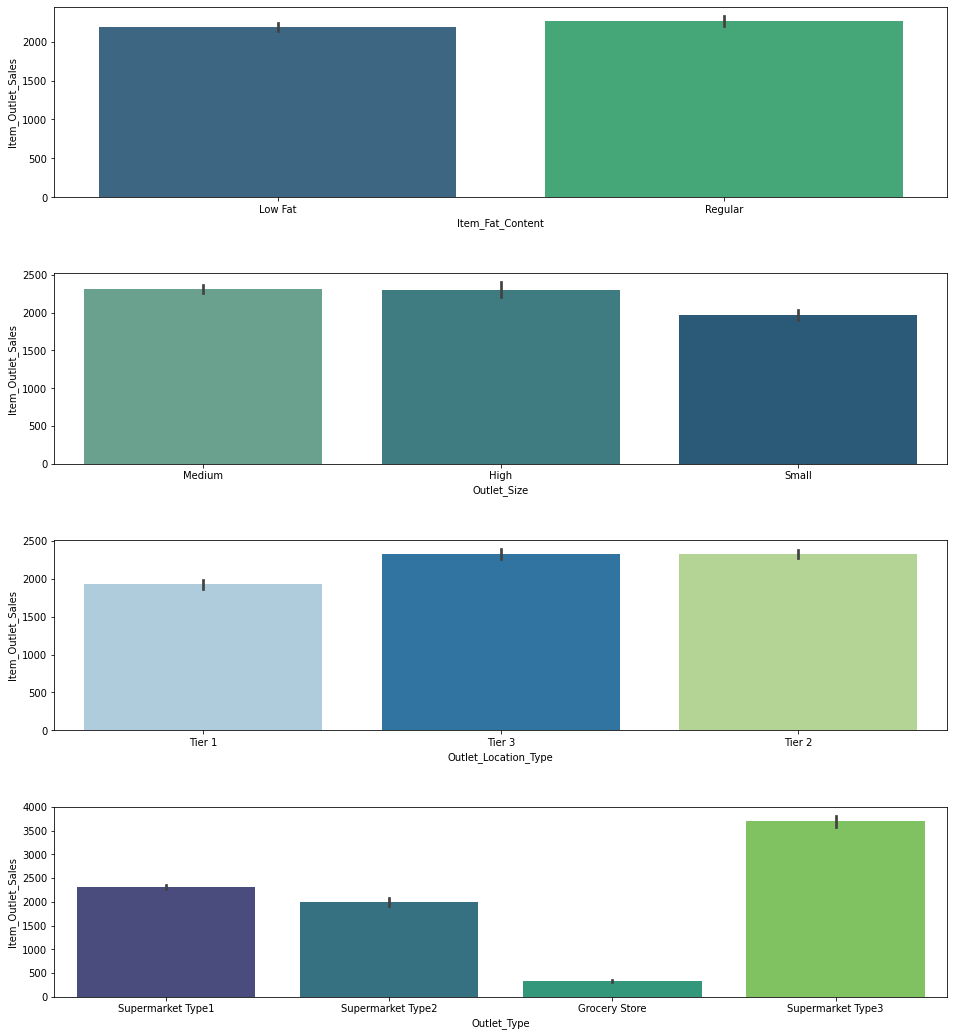

In [163]:
plt.figure(figsize = (16,10))

plt.subplot(411)
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_train, palette="viridis")

plt.subplot(412)
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train, palette="crest")

plt.subplot(413)
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_train, palette="Paired")

plt.subplot(414)
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train, palette="viridis")


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

* Inference: 

    * The difference in item types by sales is very small.
    * Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
    * Regular Fat food has slightly greater sales than Low fat foods. 
    * Suprisingly supermarket type 3 is the most profitable and not type 1.
    * Medium and high outlet sizes are pretty much even in sales.
    * Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

### Correlation and Covariance

There are two commonly used statistical measures know as Correlation and Covariance.

* <b>Covariance: </b>
    * In simple terms, Covariance is a measure used to represent how two variables differ from each other. 
    
    * The covariance value can range from -∞ to +∞, with a negative value indicating a negative relationship and a positive value indicating a positive relationship.

    * Let Σ(X) and Σ(Y) be the expected values of the variables, the covariance formula can be represented as:
    $$
    Covariance(x,y) = \frac{1}{n} {Σ}_{i=1}^{n} (x-1)(y-1)
    $$

Where,

* xi = data value of x
* yi = data value of y
* x̄ = mean of x
* ȳ = mean of y
* N = number of data values.

* <b>Correlation: </b>

    * Correlation is a measure used to represent how strongly two random variables are related to each other.
    * Positive correlation occurs when two variables move in the same direction. When variables move in the opposite direction, they are said to be negatively correlated.

    * Correlation is of three types:
        
        * Simple Correlation: In simple correlation, a single number expresses the degree to which two variables are related.
        * Partial Correlation: When one variable's effects are removed, the correlation between two variables is revealed in partial correlation.
        * Multiple correlation: A statistical technique that uses two or more variables to predict the value of one variable. 
        
    * The formula for correlation is:
    $$
    ρ(x,y) = Correlation(x,y) = \frac{cov(x,y)}{\sqrt{var(x)}{\sqrt{var(y)}}}
    $$

where,

var(X) = standard deviation of X

var(Y) = standard deviation of Y

Here we are drawing the correlation matrix which will show us the dependency of all independent variables on dependent variable ( Item_outlet_Sales in out case). 

In [164]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.007897,0.025663,-0.008436,0.009683,0.008436
Item_Visibility,-0.007897,1.000000,0.000075,-0.026080,-0.068500,0.026080
Item_MRP,0.025663,0.000075,1.000000,0.006014,0.577431,-0.006014
Outlet_Establishment_Year,-0.008436,-0.026080,0.006014,1.000000,-0.066835,-1.000000
Item_Outlet_Sales,0.009683,-0.068500,0.577431,-0.066835,1.000000,0.066835
Outlet_Age,0.008436,0.026080,-0.006014,-1.000000,0.066835,1.000000


* Inference : We can see `Item_Outlet_Sales` is highly correlated with `Item_MRP`.

### Encoding Categorical Values

Label Encoding

In [165]:
le = LabelEncoder()
label = ['Item_Fat_Content' , 'Outlet_Type' , 'Outlet_Size','Outlet_Location_Type']

for i in label:
  df_train[i] = le.fit_transform(df_train[i])
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,11


One Hot Encoding

In [167]:
#Applying one hot encoding to the column 'Item_Type'

col =['Item_Type']

oh_encoder=OneHotEncoder(handle_unknown='ignore' , sparse = False)
data_oh=pd.DataFrame(oh_encoder.fit_transform(df_train[col])).astype('int64')

data_oh.columns=oh_encoder.get_feature_names_out(col)

data_oh.index=df_train.index

new_data=pd.concat([df_train,data_oh], axis=1)
new_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,...,0,0,0,0,0,0,0,0,1,0


In [173]:
new_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Age', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

Now that we have encoded the 'Item_Type' column, we no longer require it in our dataset.Lets drop it from data. 

In [170]:
new_data=new_data.drop(columns=['Item_Type','Outlet_Establishment_Year'],axis=1)

KeyError: "['Item_Type', 'Outlet_Establishment_Year'] not found in axis"

Here we have no use of 'Item_Identifier' and 'Outlier_Identifier' in predicting the price. Thus, lets go ahead and drop it. 

In [171]:
new_data=new_data.drop(columns=['Item_Identifier','Outlet_Identifier'],axis=1)

In [172]:
new_data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,21,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,11,0,...,0,0,0,0,0,0,0,0,1,0


### Preprocessing the dataset

In [174]:
#Splitting the data into train and test data

x=new_data.drop(columns=['Item_Outlet_Sales'],axis=1)
y=new_data['Item_Outlet_Sales']

In [175]:
x.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,1,0,1,21,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,1,2,2,11,0,0,...,0,0,0,0,0,0,0,0,1,0


In [177]:
#Splitting the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [178]:
print(x_train,'/n',y_train)
x_train.shape,y_train.shape

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
4274    17.850000                 0         0.087825  196.0794            1   
3614    16.700000                 1         0.052402  115.1176            2   
1482    13.100000                 1         0.098938  195.7768            1   
176     12.300000                 1         0.064750   92.6804            1   
4280    12.150000                 0         0.132952   37.6506            1   
...           ...               ...              ...       ...          ...   
5843    12.857645                 0         0.064363  193.7794            1   
5288    11.350000                 1         0.005526  168.2790            0   
5492     5.175000                 1         0.029663  105.2622            1   
876     12.857645                 1         0.018839   62.9536            1   
7413    20.500000                 1         0.019278   82.8592            1   

      Outlet_Location_Type  Outlet_Type  Outlet_Age

((1672, 24), (1672,))

In [179]:
y_train.isnull().sum()

0

### Data Modelling

Regression Models we will be working with: 

1. Linear Regression
2. Random Forest
3. Lasso Regression
4. XGBoost Regressor

In [193]:
#Linear Regression Model

lr = LinearRegression()
lr.fit(x_train,y_train)

lr_predict = lr.predict(x_test)


#scores for the accuracy of the model
lr_mae = mean_absolute_error(y_test , lr_predict)
lr_mse = mean_squared_error(y_test , lr_predict)
lr_r2= r2_score(y_test , lr_predict)


print(f" Mean Absolute Error: {lr_mae}\n")
print(f" Squared Mean Squared Error: {np.sqrt(lr_mse)}\n")
print(f" R^2 Score: {lr_r2}\n")

 Mean Absolute Error: 914.0492737168837

 Squared Mean Squared Error: 1208.9231408558646

 R^2 Score: 0.49038987439049553



In [194]:
#Random Forest Model

rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
rf.fit(x_train,y_train)

rf_predict = rf.predict(x_test)


#scores for the accuracy of the model
rf_mae = mean_absolute_error(y_test , rf_predict)
rf_mse = mean_squared_error(y_test , rf_predict)
rf_r2= r2_score(y_test , rf_predict)


print(f" Mean Absolute Error: {rf_mae}\n")
print(f" Squared Mean Squared Error: {np.sqrt(rf_mse)}\n")
print(f" R^2 Score: {rf_r2}\n")

 Mean Absolute Error: 1014.5414478675374

 Squared Mean Squared Error: 1368.4086484680017

 R^2 Score: 0.3470614844127443



In [195]:
#Lasso Model

ls = Lasso(alpha=0.05)

#fit
ls.fit(x_train,y_train)

ls_predict = ls.predict(x_test)


#scores for the accuracy of the model
ls_mae = mean_absolute_error(y_test , ls_predict)
ls_mse = mean_squared_error(y_test , ls_predict)
ls_r2= r2_score(y_test , ls_predict)


print(f" Mean Absolute Error: {ls_mae}\n")
print(f" Squared Mean Squared Error: {np.sqrt(ls_mse)}\n")
print(f" R^2 Score: {ls_r2}\n")

 Mean Absolute Error: 913.9742623607863

 Squared Mean Squared Error: 1208.8533400518506

 R^2 Score: 0.49044872043023835



In [200]:
#Lasso Model

xgb = XGBRegressor()

#fit
xgb.fit(x_train,y_train)

xgb_predict = xgb.predict(x_test)


#scores for the accuracy of the model
xgb_mae = mean_absolute_error(y_test , xgb_predict)
xgb_mse = mean_squared_error(y_test , xgb_predict)
xgb_r2= r2_score(y_test , xgb_predict)


print(f" Mean Absolute Error: {xgb_mae}\n")
print(f" Squared Mean Squared Error: {np.sqrt(xgb_mse)}\n")
print(f" R^2 Score: {xgb_r2}\n")

 Mean Absolute Error: 887.4623254857138

 Squared Mean Squared Error: 1236.4870782907099

 R^2 Score: 0.4668863145586225



## Conclusion

In [201]:
mae= [lr_mae,rf_mae,ls_mae,xgb_mae]
mse= [lr_mse,rf_mse,ls_mse,xgb_mse]
r2= [lr_r2,rf_r2,ls_r2,xgb_r2]
scores=pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGBRegressor"],
     'mae' : mae, 'mse' : mse, 'r2' : r2})
scores

,models,mae,mse,r2
0,Linear Regression,914.049274,1.461495e+06,0.490390
1,Random Forest Regressor,1014.541448,1.872542e+06,0.347061
2,Lasso Regressor,913.974262,1.461326e+06,0.490449
3,XGBRegressor,887.462325,1.528900e+06,0.466886


As we can see, none of the models perform that great. However, among the above models, Linear Regression and Lasso Regression performs at par. 